In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(101)
tf.random.set_seed(101)

In [2]:
def generate_dataset():
    x_train = np.linspace(0, 15, 100)
    y_train = np.random.randint(0, 5) * x_train + \
        np.random.randn(*x_train.shape) + 0.5
    return x_train, y_train

In [3]:
def get_dataset():
    dataframe = np.genfromtxt('Salary_Data.csv', delimiter=',', names=True)

    x_train = dataframe['YearsExperience']
    y_train = dataframe['Salary']

    return x_train, y_train

In [4]:
def run_random():
    x_train, y_train = generate_dataset()

    random_model = tf.keras.Sequential(
        [tf.keras.layers.Dense(1, input_shape=[1])])

    optimizer = tf.keras.optimizers.Adam(0.001)

    random_model.compile(loss='mse', optimizer=optimizer)
    random_model.fit(x_train, y_train, epochs=1000, verbose=0)

    Y_preds = random_model.predict(x_train)

    print(random_model.get_weights())

    plt.scatter(x_train, y_train)
    plt.plot(x_train, Y_preds, color='red')
    plt.show()

In [5]:
def run():
    x_train, y_train = get_dataset()

    model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])

    optimizer = tf.keras.optimizers.Adam(0.5)

    model.compile(loss='mse', optimizer=optimizer)
    model.fit(x_train, y_train, epochs=50000, verbose=0)

    Y_preds = model.predict(x_train)

    print(model.get_weights())
    print('The salary for 6.5 years of experience is: {}'.format(model.predict([6.5])[0][0]))

    plt.scatter(x_train, y_train)
    plt.plot(x_train, Y_preds, color='red')
    plt.show()

[array([[2.5349636]], dtype=float32), array([2.5868437], dtype=float32)]


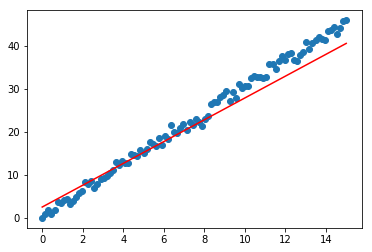

In [6]:
run_random()

[array([[9925.821]], dtype=float32), array([22566.559], dtype=float32)]
The salary for 6.5 years of experience is: 87084.3984375


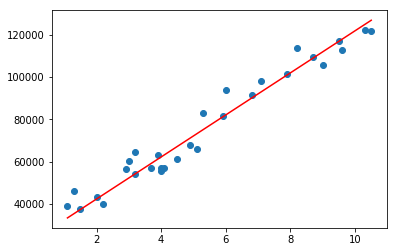

In [7]:
run()